# Project3 - Resume Screening

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

## [1] Loading Dataset

In [7]:
df = pd.read_csv(r"J:\Courses\Vihara tech (Internship)\Projects\Pro3_Resume Screening\UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


## EDA Part

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

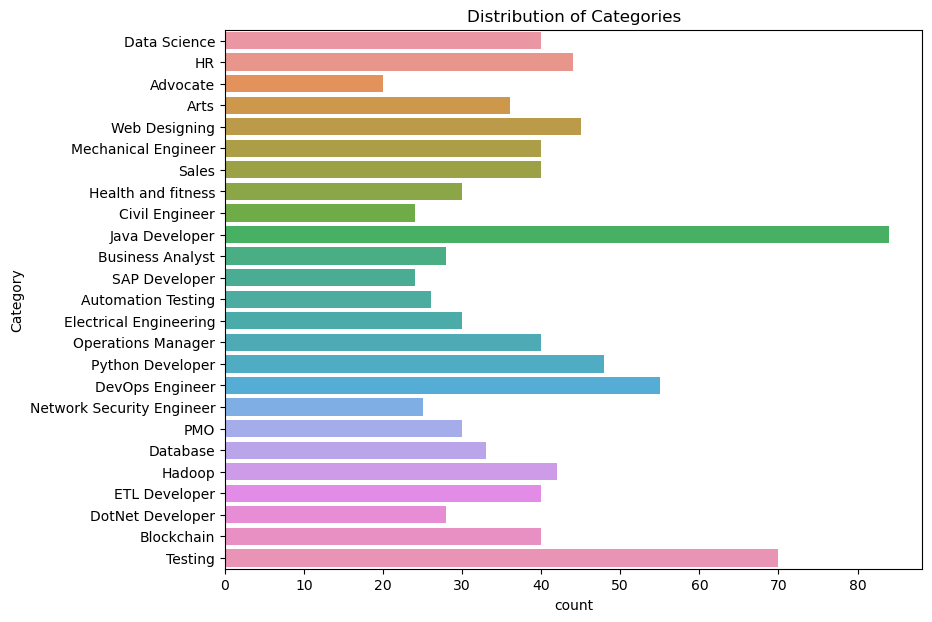

In [9]:
plt.figure(figsize = (9,7))
sns.countplot(y="Category", data=df)
plt.title("Distribution of Categories")
plt.show()

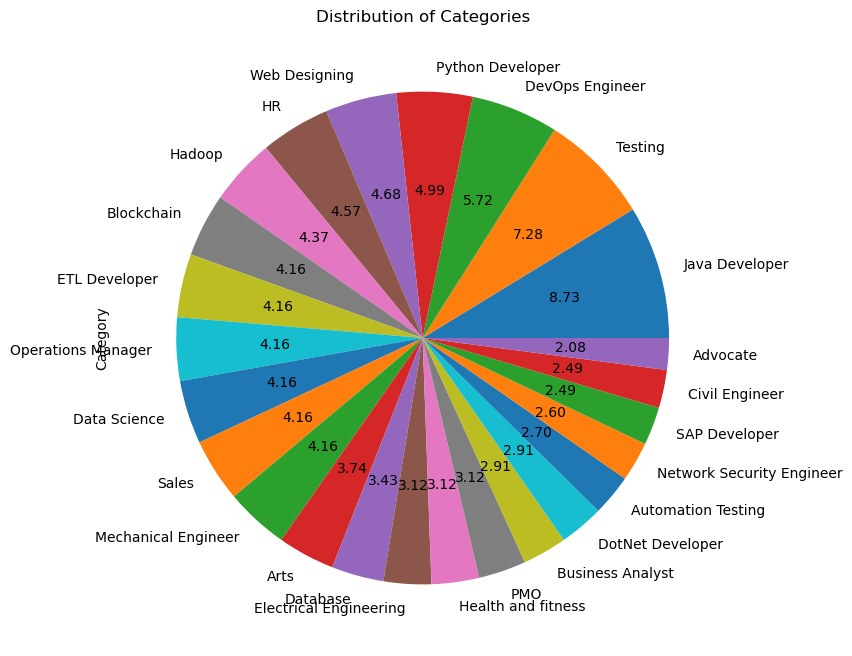

In [10]:
plt.figure(figsize = (8,8))
df["Category"].value_counts().plot(kind="pie", autopct="%1.2f")
plt.title("Distribution of Categories")
plt.show()

In [18]:
# finding most common word
import nltk
from nltk.corpus import stopwords
sentences= ""                                  #creating a blank string
total_words = []                               #creating a blank list

for i in df['Resume']:                         #using for loop in which i iterate each sentence in new resume column
    words = nltk.word_tokenize(i)              #tokenize that sentence into words and store it into a new variable
    for j in words:                            # j iterate each word using for loop
        total_words.append(j)                  # add these words into our blank list
    sentences += i                             #add that sentence into our blank list and increase the value of i

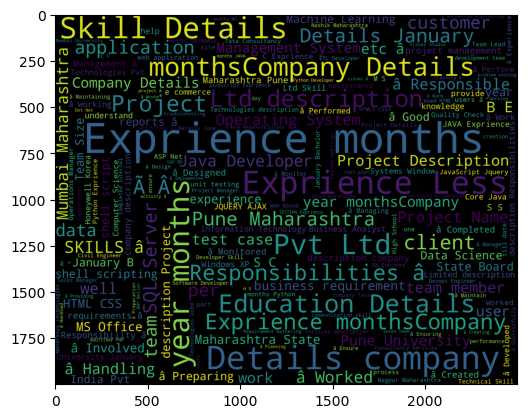

In [19]:
#lets visualize it using wordcloud
#importing library
from wordcloud import WordCloud
wc=WordCloud(width=2500, height=2000, min_font_size=15, background_color= 'black')
common= wc.generate(sentences)
plt.imshow(common)
plt.show()

## Preprocessing

In [21]:
import nltk
import sklearn 

In [22]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split
ps = PorterStemmer()
wnl = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Remove Stopwards and apply lemitization

In [24]:
# stemming
import re
def clean_resume(text):
    # Remove non-alphanumeric characters and convert to lowercase
    cleaned_text = re.sub("[^a-zA-Z0-9]", ' ', text).lower()
    
    # Tokenize the text into words
    words = cleaned_text.split()
    
    # Stem the words and remove stopwords
    stemmed_words = [ps.stem(word) for word in words if word not in stopwords.words("english")]
    
    # Join the stemmed words back into a single string
    cleaned_resume = ' '.join(stemmed_words)
    
    return cleaned_resume

In [25]:
df['Cleaned_Resume_ps'] = df['Resume'].apply(clean_resume)
df.head()

,Category,Resume,Cleaned_Resume_ps
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may 2013 may 2017 b e uit rgpv dat...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...


In [26]:
# Lemmatization
import re 
def clean_resume_wnl(text):
    # Remove non-alphanumeric characters and convert to lowercase
    cleaned_text = re.sub("[^a-zA-Z0-9]", ' ', text).lower()
    
    # Tokenize the text into words
    words = cleaned_text.split()
    
    # Stem the words and remove stopwords
    stemmed_words = [wnl.lemmatize(word) for word in words if word not in stopwords.words("english")]
    
    # Join the stemmed words back into a single string
    cleaned_resume_wnl = ' '.join(stemmed_words)
    
    return cleaned_resume_wnl

In [27]:
df['Cleaned_Resume_wnl'] = df['Resume'].apply(clean_resume_wnl)
df.head()

,Category,Resume,Cleaned_Resume_ps,Cleaned_Resume_wnl
0,Data Science,Skills * Programming Languages: Python (pandas...,skill program languag python panda numpi scipi...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,educ detail may 2013 may 2017 b e uit rgpv dat...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...,area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",educ detail mca ymcaust faridabad haryana data...,education detail mca ymcaust faridabad haryana...


In [28]:
# We can see differnce in stemming and lemmatization, lemmatization gives better output as in stemming, data can be lost

In [29]:
# dropping original column and Stemmed column

In [30]:
df = df.drop(['Resume','Cleaned_Resume_ps' ],axis = 1)

In [31]:
df.columns

Index(['Category', 'Cleaned_Resume_wnl'], dtype='object')

In [32]:
df.head()

,Category,Cleaned_Resume_wnl
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


### Splitting the data

In [39]:
# Give independent data to x & dependent data to y
x = df.iloc[:,-1]                     # independent (all rows, last column)
y = df.iloc[:,0]                      # dependent   (all rows, 1st column)

In [40]:
# Splitting the data using train_test method
from sklearn.model_selection import train_test_split

In [41]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , random_state=11)
# test_size indicates percentage of values for test i.e, 10% Data = Test & 90% Data = Train

In [42]:
x_train.head()

533    skill well versed m office internet applicatio...
521    skill well versed m office internet applicatio...
436    education detail sap technical architect sap t...
144    skill language c basic java basic web technolo...
277    education detail january 1992 january 2003 fir...
Name: Cleaned_Resume_wnl, dtype: object

In [43]:
training_data= pd.concat([x_train, y_train],axis=1)      #concat x train and y train
training_data.head()                                     #checking first 5 rows

,Cleaned_Resume_wnl,Category
533,skill well versed m office internet applicatio...,Operations Manager
521,skill well versed m office internet applicatio...,Operations Manager
436,education detail sap technical architect sap t...,SAP Developer
144,skill language c basic java basic web technolo...,Web Designing
277,education detail january 1992 january 2003 fir...,Health and fitness


In [44]:
testing_data= pd.concat([x_test, y_test],axis=1)          #concat x test and y test 
testing_data.head()                                       #checking first 5 rows

,Cleaned_Resume_wnl,Category
922,computer skill proficient m office word basic ...,Testing
538,education detail august 2000 b e electronics p...,Operations Manager
430,education detail february 2006 february 2006 t...,Business Analyst
425,technological skill knowledge computer window ...,Business Analyst
293,education detail january 2009 p g sport scienc...,Health and fitness


### Converting categorical data to numerical data

#### Using Label encoding method for dependent var to convert from cat to num data (dependent var)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data["Category"]=le.fit_transform(training_data["Category"])        #fit and tranform the data 
training_data.head()

,Cleaned_Resume_wnl,Category
533,skill well versed m office internet applicatio...,18
521,skill well versed m office internet applicatio...,18
436,education detail sap technical architect sap t...,21
144,skill language c basic java basic web technolo...,24
277,education detail january 1992 january 2003 fir...,14


In [46]:
training_data["Category"].unique()

array([18, 21, 24, 14,  7,  4,  8,  1, 23, 16, 12, 17, 13,  6, 11, 15, 10,
        3,  5, 19, 20,  2,  9, 22,  0])

(array([ 69.,  60.,  87.,  76.,  63., 104., 115.,  87.,  59., 145.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

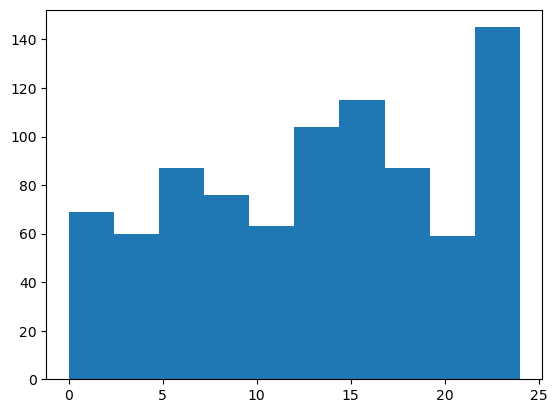

In [47]:
plt.hist(training_data['Category'])

In [48]:
# for test data (fit and tranform the data)
testing_data["Category"]=le.transform(testing_data["Category"]) 
testing_data.head()

,Cleaned_Resume_wnl,Category
922,computer skill proficient m office word basic ...,23
538,education detail august 2000 b e electronics p...,18
430,education detail february 2006 february 2006 t...,4
425,technological skill knowledge computer window ...,4
293,education detail january 2009 p g sport scienc...,14


#### Converting categorical data into numerical data using CountVectorizer (independent var)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_final = cv.fit_transform(training_data["Cleaned_Resume_wnl"]).toarray()
x_train_final

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
x_train_final.shape

(865, 6675)

In [51]:
y_train_final= training_data["Category"].values
y_train_final.shape

(865,)

In [52]:
#### with test data
x_test_final = cv.transform(testing_data["Cleaned_Resume_wnl"]).toarray()

In [53]:
x_test_final.shape

(97, 6675)

In [54]:
y_test_final= testing_data["Category"].values
y_test_final.shape

(97,)

## Model Development

In [62]:
# Giving data to RandomForest algorithm to train and build model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_final,y_train_final)

MultinomialNB()

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Train Accuracy_score = {} ".format(nb.score(x_train_final,y_train_final)))
print("Test Accuracy_score = {} ".format(nb.score(x_test_final,y_test_final)))
print()
y_test_pred = nb.predict(x_test_final)
print('Test data confusion_matrix : ',confusion_matrix(y_test_final,y_test_pred))
print('Test data classification_report : ',classification_report(y_test_final,y_test_pred))

Train Accuracy_score = 0.9988439306358381 
Test Accuracy_score = 0.9896907216494846 

Test data confusion_matrix :  [[ 3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0

### Testing Real Data

In [65]:
pro=list(le.classes_)                #extract classes
pro

['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

In [66]:
#creating a function for profile prediction for test data
def predict(sentence):
    li=[]                                           #creating a empty list
    profiles = list(le.classes_)                    #extract job profile name
    clean_sentence= clean_resume_wnl(sentence)      #call the textpreprocess function for cleaning the text and store into the new variable
    li.append(clean_sentence)                       #append the cleaning data into empty list
    s = cv.transform(li).toarray()                  #convert to numerical data and into array
    num = nb.predict(s)[0]                         #use model for prediction
    return profiles[num]                            #return profile name 

In [67]:
a = "Fitness,Personal Training, Fitness Training,Wellness.Strength Training.Nutrition.Exercise Physiology.Wellness Coaching."
predict(a)

'Health and fitness'

In [68]:
j="Analytical, motivated and hard-working Python Developer with over five years of experience designing, debugging and troubleshooting applications using Flask and Python coding languages. Hoping to use my advanced development skills to build and enhance banking applications for the finance industry."
predict(j)

'Data Science'

In [69]:
c = 'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery'
predict(c)

'Data Science'

In [70]:
d = 'Skills: Natural Languages: Proficient in English, Hindi and Marathi. Computer skills: Proficient with MS-Office, Internet operation.Education DetailsJanuary 2015 to January 2018 LLB Law Mumbai, Maharashtra Mumbai university January 2015 B.M.M  Mumbai, Maharashtra S.K.Somaiya College, Mumbai University H.S.C   Asmita Girls junior College, Maharashtra Board S.S.C Vidya Bhawan  Maharashtra Board Advocate  Llb student and Journalist Skill Details  Company Details  company - Criminal lawyer (law firm) description - '
predict(d)

'Advocate'

In [71]:
e = 'Computer Skills: Ã¢Â€Â¢ Proficient in MS office (Word, Basic Excel, Power point)'
predict(e)

'Testing'

## Save data

In [72]:
import pickle
with open('Resume Screening.pkl','wb') as f:
    pickle.dump(nb, f)

In [73]:
model = pickle.load(open('Resume Screening.pkl' , 'rb'))

In [74]:
a = ['Fitness,Personal Training, Fitness Training,Wellness.Strength Training.Nutrition.Exercise Physiology.Wellness Coaching.']
b = cv.transform(a).toarray()

In [75]:
nb.predict(b)

array([14])

In [76]:
model.predict(b)

array([14])